Model 1:

1.Perform required text pre-processing –**lowering text**, **removing URLs**, **punctuation** , **stop words** and **correct spelling** .

2.Perform **tokenization** and **lemmatization** on cleaned data .

3.Visualize the most frequent words and bigrams

4.Visualize the practical words that represent positive and negative sentiment in the dataset.

5.Create  an  embedding  layer  and  build  a  15  layer  LSTM and  a 20  layer  BidRNN  for predicting the sentiment.

6.Build your own test dataset with 10 moviereviews and tabulate accuracy.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns 
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_df=pd.read_csv("/content/drive/MyDrive/DL_Lab_02/archive/Train.csv")
valid_df=pd.read_csv("/content/drive/MyDrive/DL_Lab_02/archive/Valid.csv")
test_df=pd.read_csv("/content/drive/MyDrive/DL_Lab_02/archive/Test.csv")

In [3]:

print(train_df.shape,valid_df.shape, test_df.shape)

(40000, 2) (5000, 2) (5000, 2)


In [4]:
print(train_df['label'].value_counts())
print(valid_df['label'].value_counts())
print(test_df['label'].value_counts())

0    20019
1    19981
Name: label, dtype: int64
1    2514
0    2486
Name: label, dtype: int64
1    2505
0    2495
Name: label, dtype: int64


In [6]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


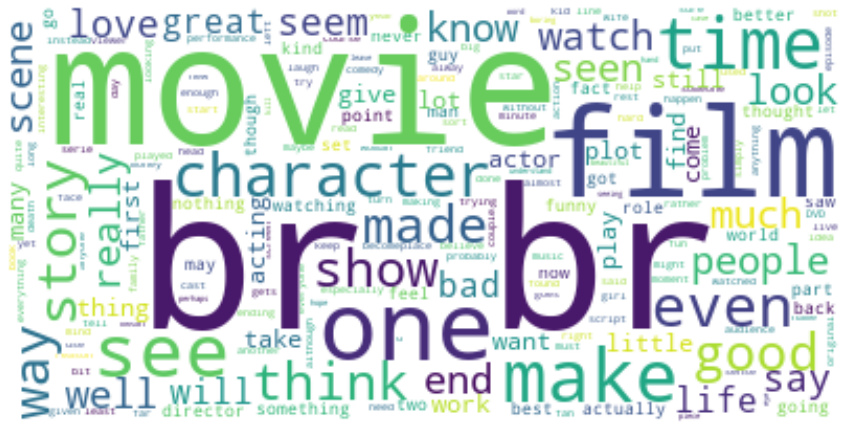

In [5]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(str(v) for v in train_df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [6]:
# Turning all text to lowercase
train_df['text'] = train_df['text'].str.lower()
valid_df['text'] = valid_df['text'].str.lower()
test_df['text'] = test_df['text'].str.lower()
train_df.head()


,text,label
0,i grew up (b. 1965) watching and loving the th...,0
1,"when i put this movie in my dvd player, and sa...",0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [7]:
#Removing URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


train_df['text']= train_df['text'].apply(remove_URL)
test_df['text']= test_df['text'].apply(remove_URL)
valid_df['text']= test_df['text'].apply(remove_URL)

In [8]:
# Removing punctuation
import string

exclude = set(string.punctuation) 

def remove_punctuation(x): 
    try: 
        x = ''.join(ch for ch in x if ch not in exclude) 
    except: 
        pass 
    return x 

train_df['text'] = train_df['text'].apply(remove_punctuation)
valid_df['text'] = valid_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(remove_punctuation)
train_df.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# Removing stopwords

from nltk.corpus import stopwords

stop = stopwords.words('english')

train_df['text'] = train_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
valid_df['text'] = valid_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_df['text'] = test_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_df.head()

In [ ]:
#Removing HTML tags and repalcing by spaces
import re
def sentence_rge(data):
    data=re.sub('<[^>]*>','',data) 
    return data
train_df['text']=train_df['text'].apply(sentence_rge)
valid_df['text']=valid_df['text'].apply(sentence_rge)
test_df['text']=test_df['text'].apply(sentence_rge)


In [ ]:
#Tokenization
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
train_df['text']= train_df['text'].apply(lambda x: tokenization(x))
test_df['text']= test_df['text'].apply(lambda x: tokenization(x))
valid_df['text']= valid_df['text'].apply(lambda x: tokenization(x))

In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob
import functools
import operator

In [16]:
# spelling correction
def spell_eng(text):
    text = [TextBlob(str(w)).correct() for w in text] #CHANGE
    #convert from tuple to str
    text = [functools.reduce(operator.add, (w)) for w in text] #CHANGE
    return text

train_df['text'] = train_df['text'].apply(spell_eng)
 

KeyboardInterrupt: ignored

In [26]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# lemmatization/stemming
def stem_eng(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w,'v') for w in text] 
train_df['text'] = train_df['text'].apply(stem_eng)
test_df['text'] = test_df['text'].apply(stem_eng)
valid_df['text'] = valid_df['text'].apply(stem_eng)

In [16]:
#Import the relevant libraries
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
cf.go_offline()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Visualizing N-grams {N=2}
 

In [ ]:
#Converting int to str


In [34]:
#Sentiment analysis for negative text
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(train_df[train_df['label'] == 1].text).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

In [32]:
#Sentiment Analysis for positive text
threshold = 0
positive_score = {}
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        positive_score[word] = weight


NameError: ignored

In [ ]:
print(train_df['text'][0])
print(train_ds[0])
print(vectorize_text(['beautiful pretty']))

In [15]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [17]:
x=train_df['text']
y=train_df['label']

In [18]:
from sklearn.model_selection import train_test_split
#y = df[['pos_neg','pos_neu','neu_neg']]

#train_vectors = vectorizer.fit_transform(x).toarray()
X_train, X_test , Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=50)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
#print(word_index)

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 5000
embedding_dim = 32
max_length = 75
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"
train_seq=tokenizer.texts_to_sequences(X_train)
train_pad_seq=pad_sequences(train_seq,maxlen=max_length,truncating=trunc_type, padding=pad_type)



valid_seq = tokenizer.texts_to_sequences(X_test)
valid_pad_seq = pad_sequences(valid_seq,maxlen=max_length)

training_labels_final = np.array(Y_train)
validation_labels_final = np.array(Y_test)

Using Embedding

In [41]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 32)            160000    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [42]:
num_epochs = 30
history = model.fit(train_pad_seq, training_labels_final, epochs=num_epochs, 
                    validation_data=(valid_pad_seq, validation_labels_final))

Epoch 1/30
1000/1000 [==============================] - 7s 4ms/step - loss: 0.6934 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.4994
Epoch 2/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.5006
Epoch 3/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 4/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 5/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.5006
Epoch 6/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.4934 - val_loss: 0.6932 - val_accuracy: 0.4994
Epoch 7/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy:

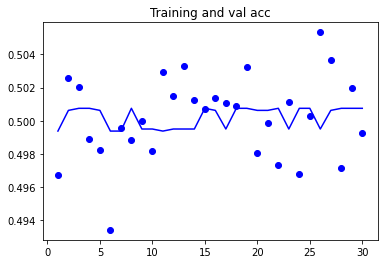

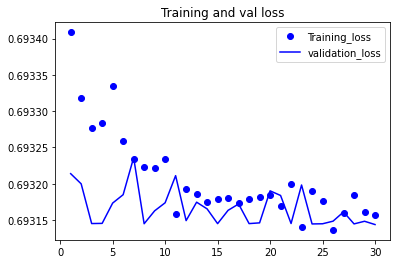

In [43]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc) +1)
plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'b',label='validation_acc')
plt.title('Training and val acc')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='validation_loss')
plt.title('Training and val loss')


plt.legend()
plt.show()

Using LSTM

In [24]:
num_epochs = 30

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(embedding_dim), 
    tf.keras.layers.Dense(8192),
    tf.keras.layers.Dense(4096),
    tf.keras.layers.Dense(2048),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1, activation='softmax')

])

learning_rate = 0.00003
model_lstm.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate),
                        metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 75, 32)            160000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_30 (Dense)            (None, 8192)              270336    
                                                                 
 dense_31 (Dense)            (None, 4096)              33558528  
                                                                 
 dense_32 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_33 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_34 (Dense)            (None, 512)              

In [25]:
history_LSTM= model_lstm.fit(train_pad_seq, training_labels_final, epochs=num_epochs,validation_data=(valid_pad_seq, validation_labels_final))

Epoch 1/30
1000/1000 [==============================] - 569s 566ms/step - loss: 0.6907 - accuracy: 0.4996 - val_loss: 0.6841 - val_accuracy: 0.4994
Epoch 2/30
1000/1000 [==============================] - 612s 612ms/step - loss: 0.6764 - accuracy: 0.4996 - val_loss: 0.6631 - val_accuracy: 0.4994
Epoch 3/30
1000/1000 [==============================] - 510s 510ms/step - loss: 0.6405 - accuracy: 0.4996 - val_loss: 0.6085 - val_accuracy: 0.4994
Epoch 4/30
 687/1000 [===================>..........] - ETA: 2:36 - loss: 0.6169 - accuracy: 0.5008

KeyboardInterrupt: ignored

Using Bidirectional RNN

In [ ]:
num_epochs = 30

model_bidi_lstm = tf.keras.Sequential([
       tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)).
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
       tf.keras.layers.Dense(1, activation='softmax') ])

learning_rate = 0.00003
model_bidi_lstm.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate),
                        metrics=['accuracy'])
model_bidi_lstm.summary()

In [ ]:
history_bidi_lstm= model_lstm.fit(train_pad_seq, training_labels_final, epochs=num_epochs,validation_data=(valid_pad_seq, validation_labels_final))